## Projeto Computacional: Otimização de Plano de Manuntenção
### Universidade Federal de Minas Gerais - Disciplina Pesquisa Operacional<br>
Professor: Eduardo Gontijo Carrano<br>
Aluno: Antonio Carlos da Anunciação<br>

---
Reumo:

Este trabalho tem como objetivo elaborar o melhor plano de manuntenção para os equipamentos de uma empresa.

---

Importando as bibliotecas:

In [1]:
import sys, os
import cplex
import docplex.mp
from docplex.mp.model import Model
import numpy as np
import matplotlib.pyplot as plt

Carregando os dados:

In [2]:
clusterDB = np.genfromtxt('clusterDB.csv',delimiter=',')
EquipDB = np.genfromtxt('EquipDB.csv',delimiter=',')
MPDB = np.genfromtxt('MPDB.csv',delimiter=',')

Formatando os dados:

In [3]:
aux = np.zeros((len(EquipDB), 2))
for i in range(0, len(EquipDB)):
    aux[i,] = clusterDB[int((EquipDB[i,2]-1)),1:]
data = np.hstack((EquipDB, aux))
data = np.delete(data, 2, 1)
# X[id, t0, custo, ni, beta]

Definindo o modelo estatistico de probabilidade das falhas:

In [4]:
def Weibull(t, ni, beta):
    F = 1 - np.exp(-(t/ni)**beta)
    return F

def probabilidadeFalha(function, delta_t, x, k):
    t, ni, beta =x[1], x[3], x[4]
    p = np.zeros((len(k)))
    for i in range(0, len(k)):
        p[i] = (function(t+k[i]*delta_t, ni, beta)-function(t, ni, beta))/(1-function(t, ni, beta))
    return p
    

Definindo os parametros do modelo estatistico:

In [5]:
k, delta_t, c_m = MPDB[:,1], 5, MPDB[:,-1]

In [6]:
p_falha_i = np.zeros((500,3))
for i in range(0, len(EquipDB)):
    p_falha_i[i,] = probabilidadeFalha(Weibull, delta_t, data[i,], k)

In [7]:
cpf = np.zeros((500,3))
for i in range(0,500):
    cpf[i,] = p_falha_i[i,]*data[i,2]

Definindo as funções objetivas:

In [10]:
def objFunction_1(x):
    custo_esperado = 0
    if type(x)==dict:
        for i in range(0,500):
            custo_esperado = custo_esperado + cpf[i,0]*x[(i,0)] + cpf[i,1]*x[(i,1)] + cpf[i,2]*x[(i,2)]
            #print("Custo acumulado esperado:", custo_esperado)
        return custo_esperado
    else:
        x_array = np.array(x)
        X_matrix = x_array.reshape((500,3))
        for i in range(0,500):
            custo_esperado = custo_esperado + cpf[i,0]*X_matrix[i,0] + cpf[i,1]*X_matrix[i,1] + cpf[i,2]*X_matrix[i,2]
            #print("Custo acumulado esperado:", custo_esperado)
        return custo_esperado


def objFunction_2(x):
    custo_manutencao = 0
    if type(x)==dict:
        for i in range(0,500):
            custo_manutencao = custo_manutencao + c_m[0]*x[(i,0)] + c_m[1]*x[(i,1)] + c_m[2]*x[(i,2)]
            #print("Custo acumulado de manuntencao:", custo_manutencao)
        return custo_manutencao
    else:
        x_array = np.array(x)
        X_matrix = x_array.reshape((500,3))
        for i in range(0,500):
            custo_manutencao = custo_manutencao + c_m[0]*X_matrix[i,0] + c_m[1]*X_matrix[i,1] + c_m[2]*X_matrix[i,2]
            #print("Custo acumulado de manutencao:", custo_manutencao)
        return custo_manutencao
        

Definição dos modelo e calculo dos conjuntos de soluções:

In [21]:
lista_solucoes = []
lista_Pareto = []

for custo_max in range(0, 1001):

    modelo = Model(name='Rotina de Manutenção')
    x = modelo.binary_var_matrix(500, 3)

    modelo.add_constraint(objFunction_2(x) <= custo_max)
    for i in range(0,500):
        modelo.add_constraint(x[(i,0)]+x[(i,1)]+x[(i,2)] == 1)

    modelo.minimize(objFunction_1(x))
    solution = modelo.solve()
    X_solution = solution.get_all_values()

    X_array = np.array(X_solution)
    X_matrix = X_array.reshape((500,3))

    pareto = np.array([objFunction_1(X_solution), objFunction_2(X_solution)])

    print("F2:", custo_max)

    lista_solucoes.append(X_matrix)
    lista_Pareto.append(pareto)

resultado = np.zeros((len(lista_solucoes), len(EquipDB)))
for i in range(0, len(lista_solucoes)):
    for j in range(0,len(lista_solucoes[i])):
        resultado[i,j] = 1 + np.argmax(lista_solucoes[i][j,:], axis=0)
        
np.savetxt("resultados.csv", resultado, delimiter=",")

F2: 0
F2: 1
F2: 2
F2: 3
F2: 4
F2: 5
F2: 6
F2: 7
F2: 8
F2: 9
F2: 10
F2: 11
F2: 12
F2: 13
F2: 14
F2: 15
F2: 16
F2: 17
F2: 18
F2: 19
F2: 20
F2: 21
F2: 22
F2: 23
F2: 24
F2: 25
F2: 26
F2: 27
F2: 28
F2: 29
F2: 30
F2: 31
F2: 32
F2: 33
F2: 34
F2: 35
F2: 36
F2: 37
F2: 38
F2: 39
F2: 40
F2: 41
F2: 42
F2: 43
F2: 44
F2: 45
F2: 46
F2: 47
F2: 48
F2: 49
F2: 50
F2: 51
F2: 52
F2: 53
F2: 54
F2: 55
F2: 56
F2: 57
F2: 58
F2: 59
F2: 60
F2: 61
F2: 62
F2: 63
F2: 64
F2: 65
F2: 66
F2: 67
F2: 68
F2: 69
F2: 70
F2: 71
F2: 72
F2: 73
F2: 74
F2: 75
F2: 76
F2: 77
F2: 78
F2: 79
F2: 80
F2: 81
F2: 82
F2: 83
F2: 84
F2: 85
F2: 86
F2: 87
F2: 88
F2: 89
F2: 90
F2: 91
F2: 92
F2: 93
F2: 94
F2: 95
F2: 96
F2: 97
F2: 98
F2: 99
F2: 100
F2: 101
F2: 102
F2: 103
F2: 104
F2: 105
F2: 106
F2: 107
F2: 108
F2: 109
F2: 110
F2: 111
F2: 112
F2: 113
F2: 114
F2: 115
F2: 116
F2: 117
F2: 118
F2: 119
F2: 120
F2: 121
F2: 122
F2: 123
F2: 124
F2: 125
F2: 126
F2: 127
F2: 128
F2: 129
F2: 130
F2: 131
F2: 132
F2: 133
F2: 134
F2: 135
F2: 136
F2: 137
F2: 13

In [22]:
f1 = np.zeros(len(lista_Pareto))
f2 = np.zeros(len(lista_Pareto))

for j in range(0,len(lista_Pareto)):
    f1[j] = lista_Pareto[j][0]
    f2[j] = lista_Pareto[j][1]

Calculo da fronteira da região factivel:

In [17]:
lista_solucoes_factiveis = []
lista_pontos_factiveis = []

for custo_min in range(0, 1001):
    modelo = Model(name='Rotina de Manutenção')
    # Definindo a variaavel do tipo inteira:
    x = modelo.binary_var_matrix(500, 3)
    
    modelo.add_constraint(objFunction_2(x) >= custo_min)
    for i in range(0,500):
        modelo.add_constraint(x[(i,0)]+x[(i,1)]+x[(i,2)] == 1)
    
    modelo.maximize(objFunction_1(x))
    solution = modelo.solve()
    X_solution = solution.get_all_values()
    
    X_array = np.array(X_solution)
    X_matrix = X_array.reshape((500,3))
    
    pareto = np.array([objFunction_1(X_solution), objFunction_2(X_solution)])
    
    print("Custo minimo de F2:", custo_min)
    
    lista_solucoes_factiveis.append(X_matrix)
    lista_pontos_factiveis.append(pareto)

Custo minimo de F2: 0
Custo minimo de F2: 1
Custo minimo de F2: 2
Custo minimo de F2: 3
Custo minimo de F2: 4
Custo minimo de F2: 5
Custo minimo de F2: 6
Custo minimo de F2: 7
Custo minimo de F2: 8
Custo minimo de F2: 9
Custo minimo de F2: 10
Custo minimo de F2: 11
Custo minimo de F2: 12
Custo minimo de F2: 13
Custo minimo de F2: 14
Custo minimo de F2: 15
Custo minimo de F2: 16
Custo minimo de F2: 17
Custo minimo de F2: 18
Custo minimo de F2: 19
Custo minimo de F2: 20
Custo minimo de F2: 21
Custo minimo de F2: 22
Custo minimo de F2: 23
Custo minimo de F2: 24
Custo minimo de F2: 25
Custo minimo de F2: 26
Custo minimo de F2: 27
Custo minimo de F2: 28
Custo minimo de F2: 29
Custo minimo de F2: 30
Custo minimo de F2: 31
Custo minimo de F2: 32
Custo minimo de F2: 33
Custo minimo de F2: 34
Custo minimo de F2: 35
Custo minimo de F2: 36
Custo minimo de F2: 37
Custo minimo de F2: 38
Custo minimo de F2: 39
Custo minimo de F2: 40
Custo minimo de F2: 41
Custo minimo de F2: 42
Custo minimo de F2: 4

Custo minimo de F2: 346
Custo minimo de F2: 347
Custo minimo de F2: 348
Custo minimo de F2: 349
Custo minimo de F2: 350
Custo minimo de F2: 351
Custo minimo de F2: 352
Custo minimo de F2: 353
Custo minimo de F2: 354
Custo minimo de F2: 355
Custo minimo de F2: 356
Custo minimo de F2: 357
Custo minimo de F2: 358
Custo minimo de F2: 359
Custo minimo de F2: 360
Custo minimo de F2: 361
Custo minimo de F2: 362
Custo minimo de F2: 363
Custo minimo de F2: 364
Custo minimo de F2: 365
Custo minimo de F2: 366
Custo minimo de F2: 367
Custo minimo de F2: 368
Custo minimo de F2: 369
Custo minimo de F2: 370
Custo minimo de F2: 371
Custo minimo de F2: 372
Custo minimo de F2: 373
Custo minimo de F2: 374
Custo minimo de F2: 375
Custo minimo de F2: 376
Custo minimo de F2: 377
Custo minimo de F2: 378
Custo minimo de F2: 379
Custo minimo de F2: 380
Custo minimo de F2: 381
Custo minimo de F2: 382
Custo minimo de F2: 383
Custo minimo de F2: 384
Custo minimo de F2: 385
Custo minimo de F2: 386
Custo minimo de 

Custo minimo de F2: 688
Custo minimo de F2: 689
Custo minimo de F2: 690
Custo minimo de F2: 691
Custo minimo de F2: 692
Custo minimo de F2: 693
Custo minimo de F2: 694
Custo minimo de F2: 695
Custo minimo de F2: 696
Custo minimo de F2: 697
Custo minimo de F2: 698
Custo minimo de F2: 699
Custo minimo de F2: 700
Custo minimo de F2: 701
Custo minimo de F2: 702
Custo minimo de F2: 703
Custo minimo de F2: 704
Custo minimo de F2: 705
Custo minimo de F2: 706
Custo minimo de F2: 707
Custo minimo de F2: 708
Custo minimo de F2: 709
Custo minimo de F2: 710
Custo minimo de F2: 711
Custo minimo de F2: 712
Custo minimo de F2: 713
Custo minimo de F2: 714
Custo minimo de F2: 715
Custo minimo de F2: 716
Custo minimo de F2: 717
Custo minimo de F2: 718
Custo minimo de F2: 719
Custo minimo de F2: 720
Custo minimo de F2: 721
Custo minimo de F2: 722
Custo minimo de F2: 723
Custo minimo de F2: 724
Custo minimo de F2: 725
Custo minimo de F2: 726
Custo minimo de F2: 727
Custo minimo de F2: 728
Custo minimo de 

In [23]:
f1f = np.zeros(len(lista_pontos_factiveis))
f2f = np.zeros(len(lista_pontos_factiveis))

for j in range(0,len(lista_pontos_factiveis)):
    f1f[j] = lista_pontos_factiveis[j][0]
    f2f[j] = lista_pontos_factiveis[j][1]

Plotando os resultados:

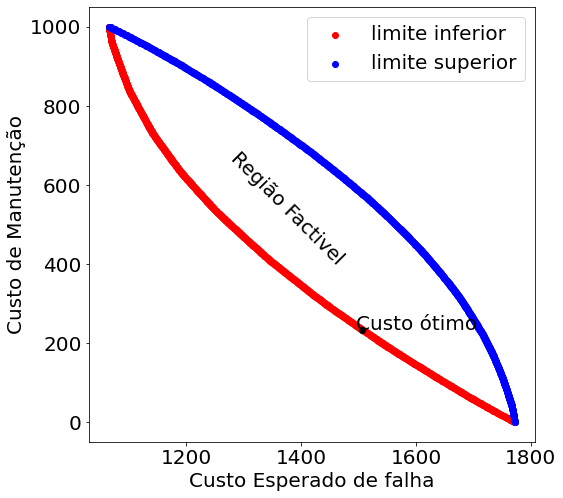

In [68]:
custo_total = []
for custo in range(0,len(f1)):
    custo_total.append(f1[custo]+f2[custo])
min_index = custo_total.index(min(custo_total))

plt.figure(figsize=(8,8))
plt.scatter(f1, f2, color = "red", label = 'limite inferior')
plt.scatter(f1f, f2f, color = "blue", label = 'limite superior')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.legend(prop={'size': 20})
plt.annotate("Região Factivel", [1270,400], fontsize=20, rotation=-45)

plt.scatter(f1[min_index], f2[min_index], color = "black")
plt.annotate("Custo ótimo", [f1[min_index]-10,f2[min_index]], fontsize=20)

plt.xlabel('Custo Esperado de falha', fontsize=20)
plt.ylabel('Custo de Manutenção', fontsize=20)
plt.show()

Custo ótimo:

In [43]:
custo_total = []
for custo in range(0,len(f1)):
    custo_total.append(f1[custo]+f2[custo])
min_index = custo_total.index(min(custo_total))

In [72]:
min_index = custo_total.index(min(custo_total))
print("F1:", format(f1[min_index], '.2f'), ", F2:", format(f2[min_index], '.2f'), ", Custo ótimo:", format(min(custo_total),'.2f'))

F1: 1506.01 , F2: 234.00 , Custo ótimo: 1740.01


---